# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [9]:
# Identify truth or bluff. Position vs. salary people declare in an interview
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Training the Linear Regression model on the whole dataset

We will leverage the full dataset to predict linearity between salaries and positions

In [12]:
# 1 feature (position), 1 label (salary)
from sklearn.linear_model import LinearRegression

# Initiate the model
linReg = LinearRegression()

# Fit the model to the full dataset
linReg.fit(X,y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset
Assuming it is not linear but exponential

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
# Initiate the polynomial function
polyReg = PolynomialFeatures(degree=2) # 4 is even more accurate!!!

In [34]:
# Fit the polynomial rule and transform the feature's degree into a squared feature!
X_poly = polyReg.fit_transform(X)

In [35]:
# Initiate and fit the model on a squared feature polynomial model
linReg_2 = LinearRegression()
linReg_2.fit(X_poly,y)

LinearRegression()

## Visualising the Linear Regression results

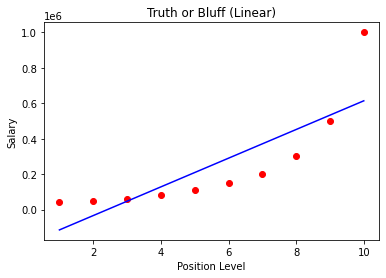

In [27]:
plt.scatter(X,y,color='red')
plt.plot(X,linReg.predict(X),color='blue')
plt.title("Truth or Bluff (Linear)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

# Notice how this is not really linear. The model will not be very accurate...

## Visualising the Polynomial Regression results

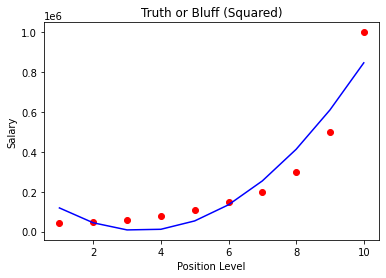

In [36]:
plt.scatter(X,y,color='red')
plt.plot(X,linReg_2.predict(X_poly),color='blue')
plt.title("Truth or Bluff (Squared)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

# More accurate

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

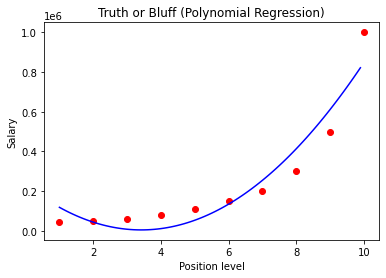

In [39]:
# Not really needed...
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linReg_2.predict(polyReg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [40]:
linReg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [41]:
linReg_2.predict(polyReg.fit_transform([[6.5]]))

array([189498.10606061])